In [1]:
import os
from math import *

import numpy as np
import pandas as pd
import filterpy 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# define defferent aorder filter
refer:
https://nbviewer.jupyter.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/08-Designing-Kalman-Filters.ipynb#

# filtering 

(362,)


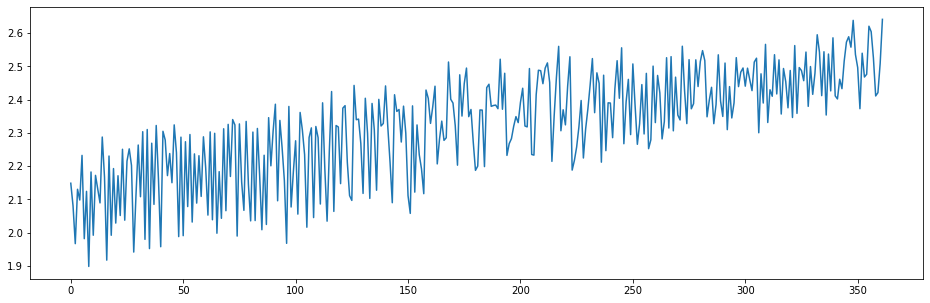

In [11]:
SIMULATE = False

if SIMULATE:
    # simulate data
    l = []
    for i in range(400):
        y = 0.1+0.002*i+ np.random.standard_normal()*0.1 
        l.append(y) 
    train_s = pd.Series(l)
else:
    # read series
    train_df = pd.read_csv("./temp/result_outlier.csv")
    train_s = train_df.down_collectorEmitterVoltage_llr

print(train_s.shape)
plt.figure(figsize = (16,5))
plt.plot(train_s)

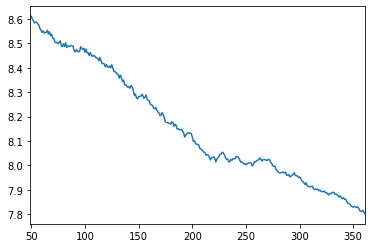

In [5]:
train_s = train_df.down_collectorEmitterVoltage_max
ts = train_s.rolling(window=50).mean().dropna()
ts.plot()

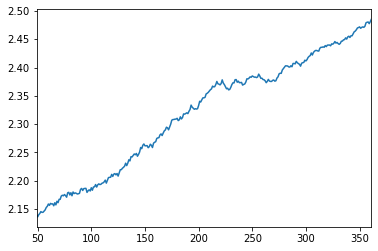

In [4]:
ts = train_s.rolling(window=50).mean().dropna()
ts.plot()

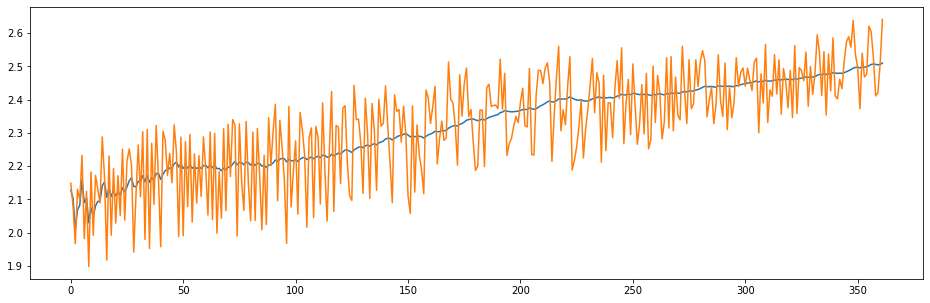

In [16]:
from mylab.myfilter.myfilter import FirstOrderKF
from mylab.myfilter.myfilter import myKalmanFilter
# filter the data
# get zs (measured/sensor data)
zs = train_s.values
# kanlman filter
R, Q = 1, 1e-7
Kalman_filter = FirstOrderKF(R, Q, dt=1)
# Kalman_filter = SecondOrderKF(R, Q, 1, P=1)
zs_filtered, err = myKalmanFilter(Kalman_filter,zs )
# plot 
plt.figure(figsize = (16,5))
plt.plot(zs_filtered)
plt.plot(zs)

In [15]:
# save flitered data
train_df = train_s.to_frame()
train_df.columns = ["ts"]
train_df["ts_filtered"] = zs_filtered
train_df.to_csv("./temp/result_filtered.csv",index = False)
train_df.head()

,ts,ts_filtered
0,2.148368,2.127305
1,2.080417,2.103067
2,1.966582,2.011695
3,2.130172,2.068167
4,2.097866,2.082540
